## Imports

In [2]:
# to handle datasets
import pandas as pd
import numpy as np


# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Loading in the Data and Examine

In [3]:
# Reading in data into a dataframe 
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

* There is 400 Observations of 26 variable. 
* There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
# finding categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
# finding numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 14 categorical variables
There are 12 numerical variables


In [9]:
# view of categorical variables
df[categorical].head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


There are some unknown characters like '\t?' present in `pcv`, `wc`, and `rc` variables. So these variables are identified as categorical variables. This can be rectified in data cleaning .

In [10]:
# view of numerical variables
df[numerical].head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


`id` column should be dropped as it is unique to every observation. Here `bp`,`sg`, `al` and `su` are the discrete variables and remaining variables are continuous.

In [11]:
#calculate missing values by column
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

There are missing values in the data. We can see `rbc` column has maximum missing values. 

## Data Cleaning

In [12]:
# let's calculate the percentage of missing values
(df.isnull().sum()/len(df))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

Let us drop some of variables which have higher percentage of missing data (>20%) such as `rbc`,`sod`, `pot`, `wc`, and `rc`.

In [13]:
df = df.drop(['rbc','sod','pot','wc','rc'],axis = 1)

##### age

Text(0.5, 1.0, 'age Distribution')

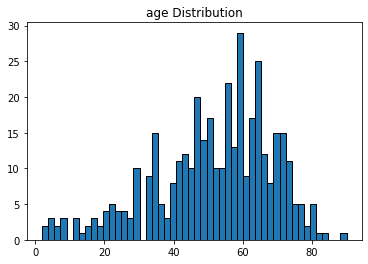

In [14]:
plt.hist(df['age'], bins = 50, edgecolor = 'k');
plt.title('age Distribution')

As we can most of the most of the population lies between 45 to 65 years and the median for age variable is 55. We can fill the null values with the median.

In [15]:
df['age']=df['age'].fillna(df['age'].median())

##### bp, sg, al, su

`bp`,`sg`, `al` and `su` are the discrete variables. So filling the missing values with most repeating value i.e., using mode().

In [16]:
for i in ['bp','sg','al','su']:
    df[i]=df[i].fillna(df[i].mode()[0])

Filling all the nominal(categorical) variables with mode.

In [17]:
print(df['dm'].value_counts())
print(df['cad'].value_counts())

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
no      362
yes      34
\tno      2
Name: cad, dtype: int64


In [18]:
df['dm'] = df['dm'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'}) #replacing '\tno' with 'no', '\tyes' with yes, ' yes' with 'yes'
df['cad'] = df['cad'].replace({'\tno':'no'}) #replacing '\tno' with 'no'

In [19]:
for i in ['pc','pcc','ba','htn','dm','cad','appet','pe','ane']:
    df[i]=df[i].fillna(df[i].mode()[0])

##### bgr

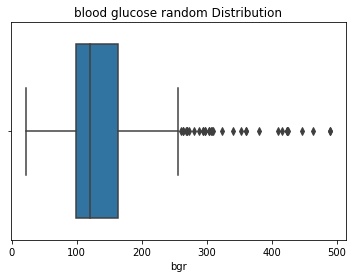

In [20]:
sns.boxplot(df['bgr']);
plt.title('blood glucose random Distribution')
plt.show()

Filling missing values with median as blood glucose random Distribution contains few outliers.

In [21]:
df['bgr']=df['bgr'].fillna(df['bgr'].median())

##### bu

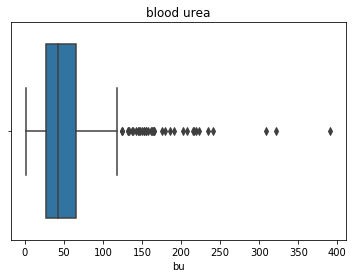

In [22]:
sns.boxplot(df['bu'])
plt.title('blood urea')
plt.show()

Removed observations with blood urea more than 250 as there are very much away from the remaining obsevations.

In [23]:
df = df[df['bu']<250]

In [24]:
df['bu']=df['bu'].fillna(df['bu'].median())

##### sc

In [25]:
df['sc']=df['sc'].fillna(df['sc'].median())

##### hemo

In [26]:
df['hemo']=df['hemo'].fillna(df['hemo'].median())

##### pcv

In [27]:
df['pcv'] = df['pcv'].replace({'\t43':'43','\t?':np.NaN})
df['pcv']=df['pcv'].fillna(df['pcv'].median()).astype(float)

In [28]:
df['classification']=df['classification'].replace("ckd\t","ckd") 

## Exploratory Data Analysis

ckd       61.904762
notckd    38.095238
Name: classification, dtype: float64


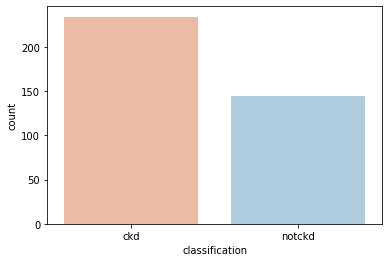

In [29]:
#Target Variable
print(df.classification.value_counts(normalize = True)*100)
sns.countplot('classification', data=df, palette="RdBu")
plt.show()

There are around 62% of observations with chronic kidney diease(ckd) and 38% of observations without chronic kidney diease(notckd).

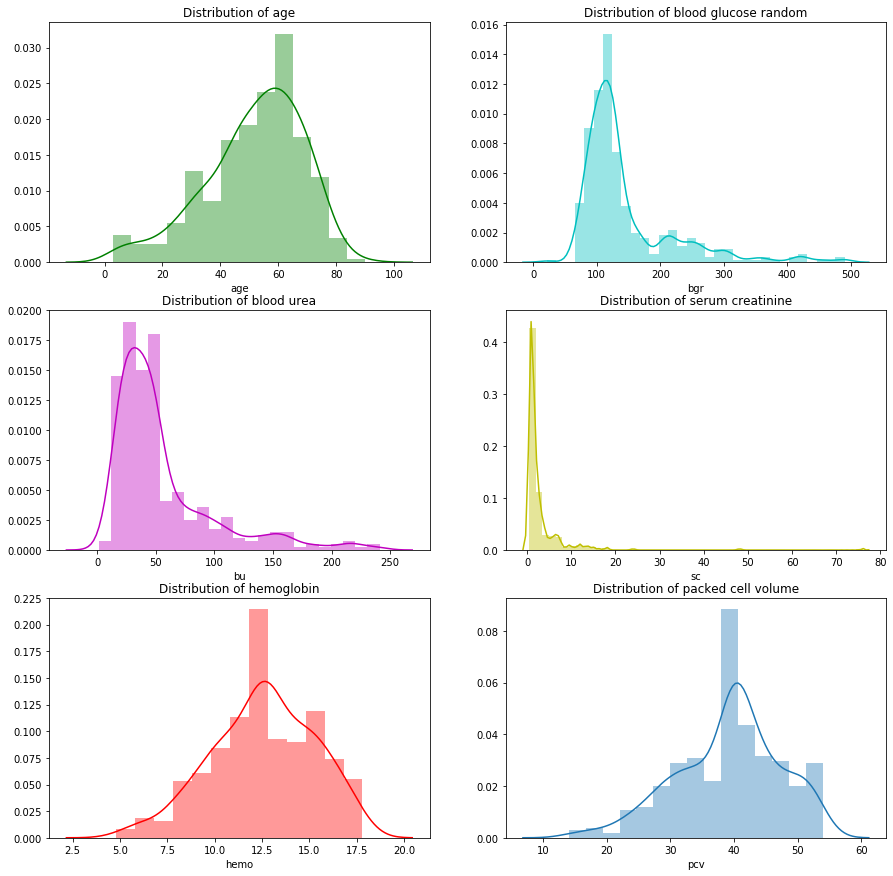

In [30]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
ax = ax.flatten()

a=sns.distplot(df['age'], color='g', ax=ax[0])
b=sns.distplot(df['bgr'], color='c', ax=ax[1])
c=sns.distplot(df['bu'], color='m', ax=ax[2])
d=sns.distplot(df['sc'], color='y', ax=ax[3])
e=sns.distplot(df['hemo'], color='r', ax=ax[4])
f=sns.distplot(df['pcv'], ax=ax[5])
a.title.set_text('Distribution of age')
b.title.set_text('Distribution of blood glucose random')
c.title.set_text('Distribution of blood urea')
d.title.set_text('Distribution of serum creatinine')
e.title.set_text('Distribution of hemoglobin')
f.title.set_text('Distribution of packed cell volume')

plt.show()

* Most of the population is between 50 t0 70 years.
* Blood glucose random, blood urea, serum creatinine are highly right skewed where as hemoglobin and packed cell volume are slightly left skewed.


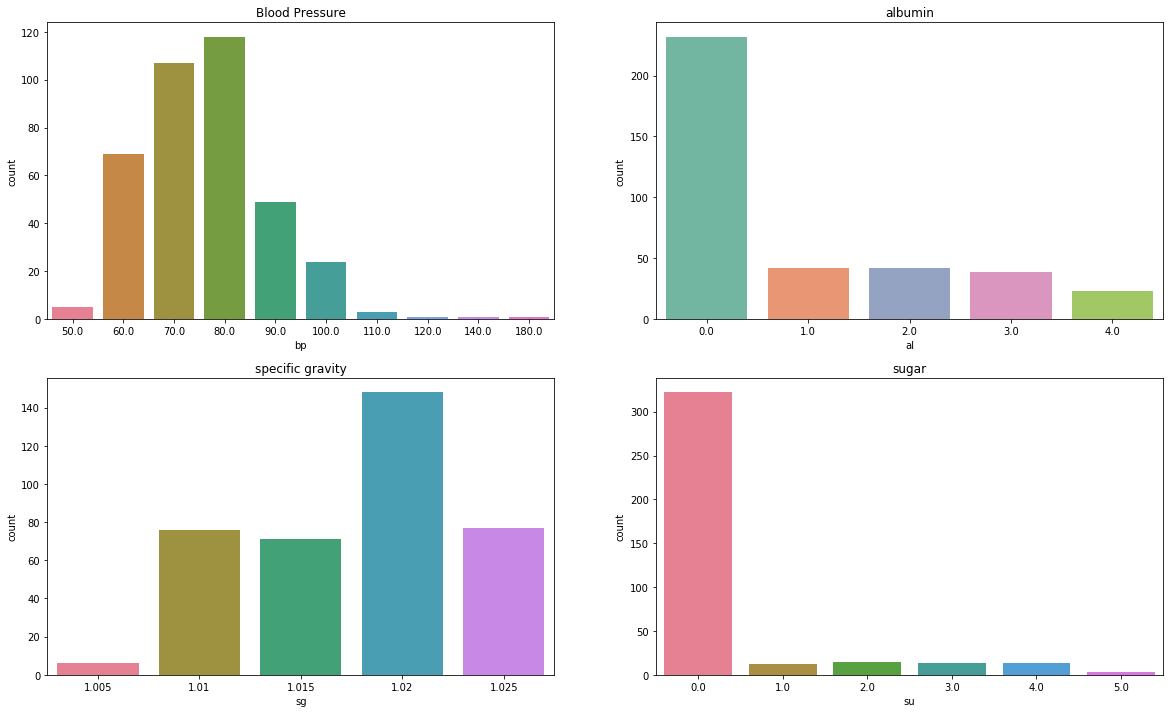

In [31]:

fig,ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.flatten()

a=sns.countplot(x="bp", palette="husl", data=df, ax=ax[0])
b=sns.countplot(x="al", palette="Set2", data=df, ax=ax[1])
c=sns.countplot(x="sg", palette="husl", data=df, ax=ax[2])
d=sns.countplot(x="su",  palette="husl", data=df, ax=ax[3])
a.title.set_text('Blood Pressure')
b.title.set_text('albumin')
c.title.set_text('specific gravity')
d.title.set_text('sugar')

plt.show()

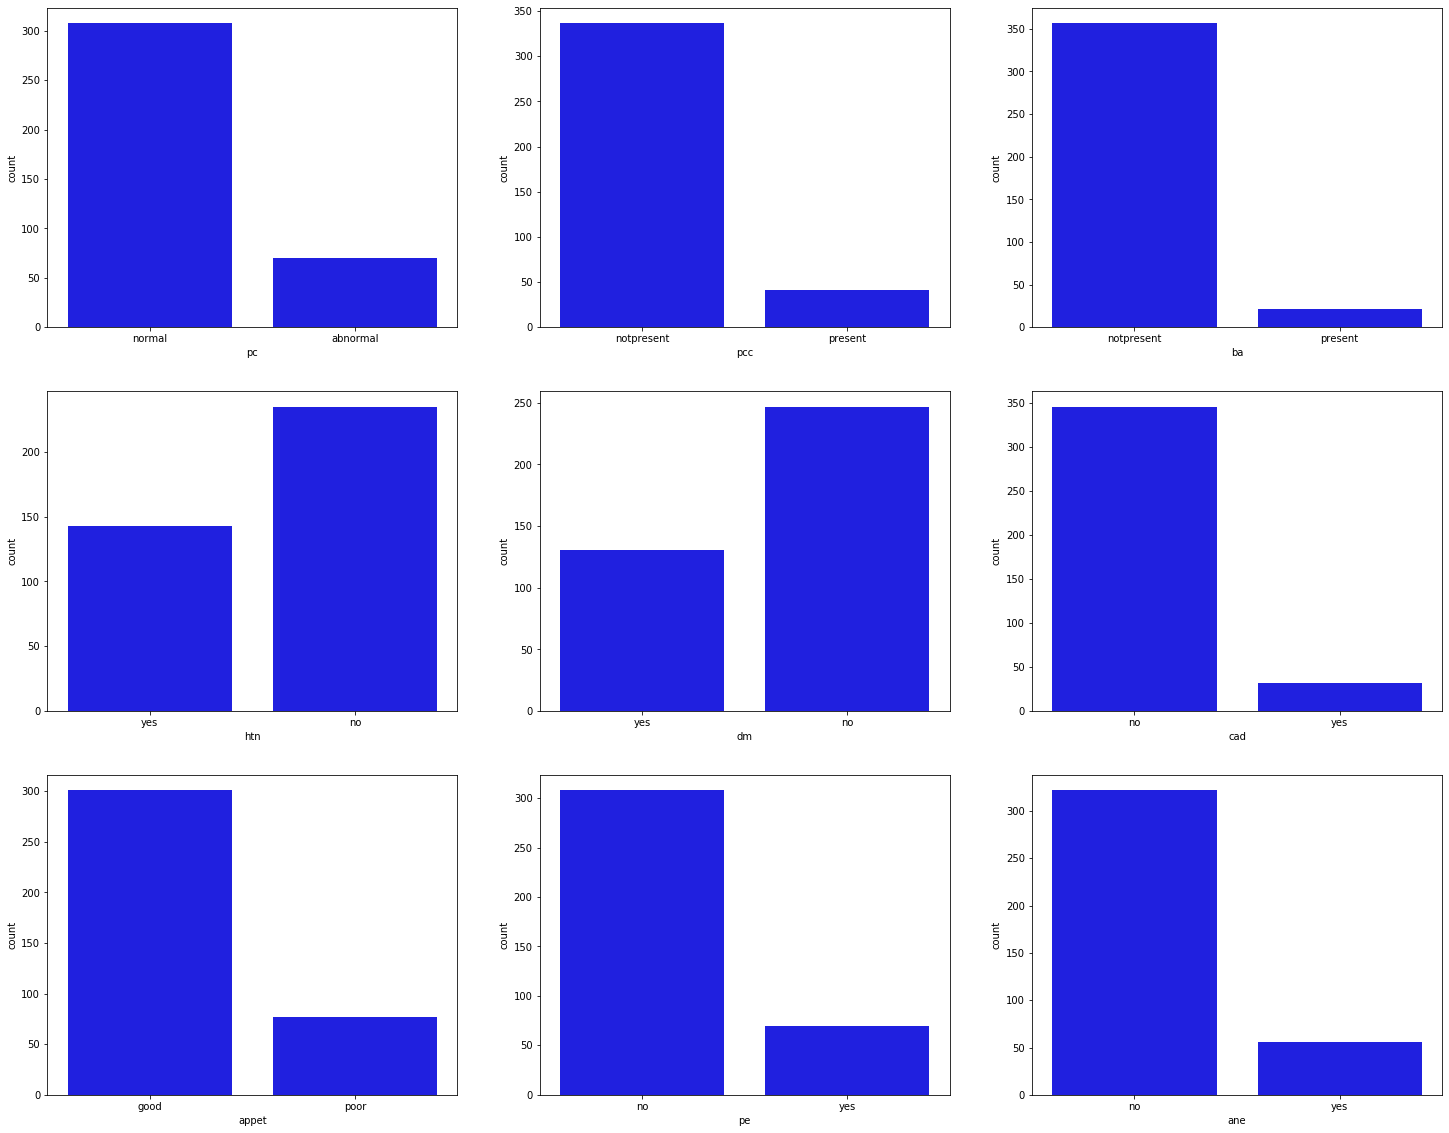

In [32]:
fig,ax = plt.subplots(3,3,figsize=(25,20))
ax = ax.flatten()
for i, column in enumerate(['pc','pcc', 'ba', 'htn','dm', 'cad', 'appet', 'pe', 'ane',]):
    sns.countplot(column, data=df, color='b', ax=ax[i])
    

plt.show()

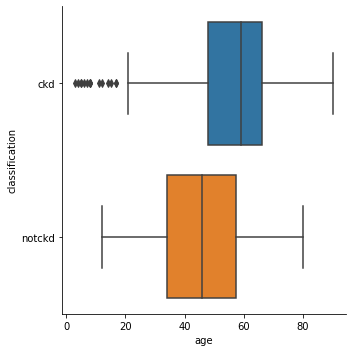

In [33]:
#plot between age and target variable
sns.catplot(x="age", y="classification", kind="box", data=df)
plt.show()

* Most of the chronic kidney disease pateints are between 50 to 70 years of age.
* We can also see that people with chronic kidney diease below 20 years of age 

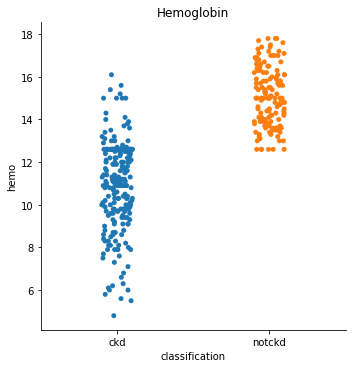

In [34]:
sns.catplot(x="classification", y="hemo", data=df)
plt.title('Hemoglobin')
plt.show();

* Low Hemoglobin levels can be seen in most of the chronic kidney disease patients. Where as, Hemoglobin levels for people without chronic kidney disease are in normal range.

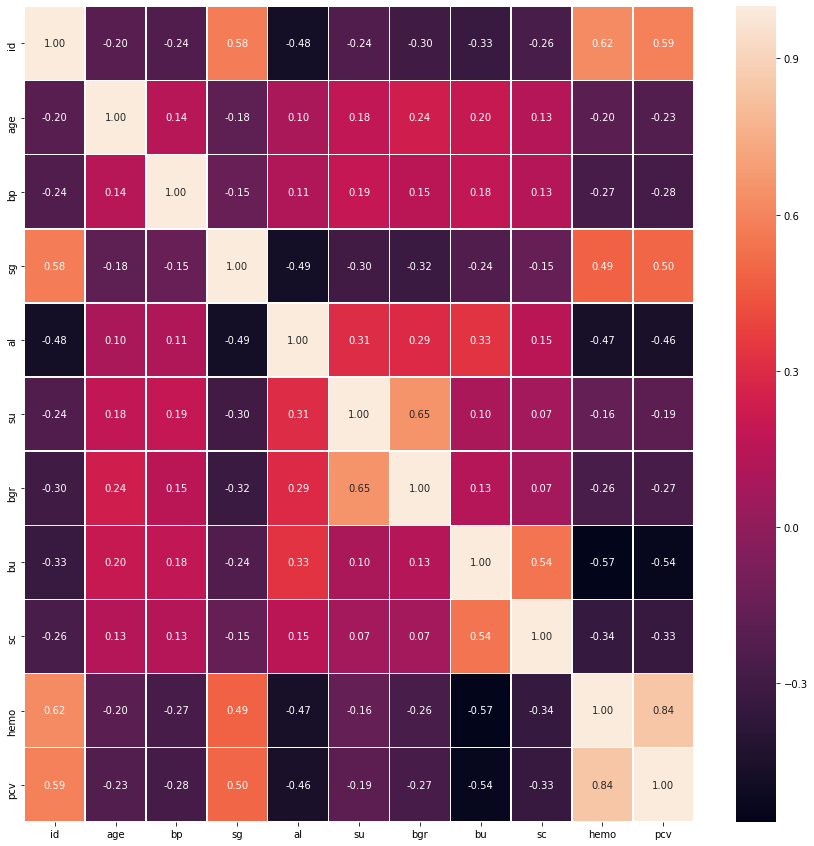

In [51]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5)
plt.show()

## Feature Engineering

In [52]:
#converting nominal data to numerical using label encoding as there only two classes in the selected variables.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

cols = ['pc','pcc','ba','htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in cols:
    df[col] = labelencoder.fit_transform(df[col])

In [53]:
#converting target variable to numerical
df['classification'] = df['classification'].replace({'ckd':1,'notckd':0})

In [54]:
#Dropping 'id' column.
df.drop("id",axis=1,inplace=True)

In [55]:
df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,44.0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,0,0,121.0,18.0,0.8,11.3,38.0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,31.0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,32.0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,35.0,0,0,0,0,0,0,1


## Split Into Training and Testing Sets

In [56]:
X = df.drop('classification',axis=1)
y = df['classification']

In [57]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit(maxiter=5)
(result.summary())

         Current function value: 0.020212
         Iterations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         classification   No. Observations:                  378
Model:                          Logit   Df Residuals:                      358
Method:                           MLE   Df Model:                           19
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                  0.9696
Time:                        11:39:47   Log-Likelihood:                -7.6401
converged:                      False   LL-Null:                       -251.19
Covariance Type:            nonrobust   LLR p-value:                 2.829e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        529.5724    163.111      3.247      0.001     209.881     849.263
age           -0.0168      0.030     -0.568      0.570      -0.075       0.041
bp             0.0313      0.042      0.744      0.457      -0.051       0.114
sg          -505.7920    159.236     -3.176      0.001    -817.889    -193.695
al             1.0696      0.705      1.517      0.129      -0.312       2.452
su             0.5284      1.132      0.467      0.641      -1.691       2.748
pc            -0.6508      2.868     -0.227      0.820      -6.271       4.970
pcc           -0.0721      4.727     -0.015      0.988      -9.337       9.193
ba            -1.2082      5.249     -0.230      0.818     -11.497       9.081
bgr            0.0102      0.014      0.737      0.461      -0.017       0.037
bu            -0.0084      0.028     -0.299      0.765      -0.063       0.047
sc             0.3778      0.472      0.800      0.424      -0.548       1.304
hemo          -0.7817      0.493     -1.587      0.113      -1.747       0.184
pcv           -0.1772      0.146     -1.210      0.226      -0.464       0.110
htn            2.2561      1.750      1.289      0.197      -1.174       5.686
dm             2.7342      1.998      1.369      0.171      -1.181       6.649
cad           -3.3284      4.037     -0.824      0.410     -11.242       4.585
appet          3.2093      1.966      1.632      0.103      -0.644       7.062
pe             2.1216      2.233      0.950      0.342      -2.254       6.497
ane           -1.6009      2.848     -0.562      0.574      -7.183       3.981
==============================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
knn = KNeighborsClassifier()
param={'n_neighbors':np.arange(1,25),"weights":['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [60]:
GS.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [61]:
dt=DecisionTreeClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

par_dt={"criterion":['entropy','gini']}
GS_dt=GridSearchCV(dt,par_dt,cv=3,scoring='roc_auc')
GS_dt.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [63]:
GS_dt.best_params_

{'criterion': 'entropy'}

In [64]:
rf= RandomForestClassifier()
param_grid={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50,5),
            'min_samples_split':range(10,100,50),'n_estimators':[1,2,3,4,5]}
rs= RandomizedSearchCV(rf, param_distributions=param_grid, cv=3)
rs.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [65]:
rs.best_params_

{'n_estimators': 3,
 'min_samples_split': 60,
 'min_samples_leaf': 1,
 'max_depth': 8}

In [66]:
lr=LogisticRegression()
dt_final=DecisionTreeClassifier(criterion="entropy",random_state=0)
knn_final=KNeighborsClassifier(n_neighbors=13,weights='distance')
rf_final=rf= RandomForestClassifier(**rs.best_params_)


In [67]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTree',dt_final))
models.append(('Random Forest',rf_final))
models.append(('knn_classifier',knn_final))

In [68]:
results = []
names = []
mean_score=[]
for name,model in models:
    kfold = KFold(shuffle = True,n_splits= 4,random_state=0)
    cv_results =cross_val_score(model,X,y,cv = kfold,scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    mean_score.append(np.mean(cv_results))
    print('%s: %f (%f)'%(name,np.mean(cv_results),np.var(cv_results,ddof=1)))


LogisticRegression: 0.996071 (0.000010)
DecisionTree: 0.973364 (0.000715)
Random Forest: 0.997686 (0.000006)
knn_classifier: 0.952483 (0.000571)


Text(0, 0.5, 'Accuracy')

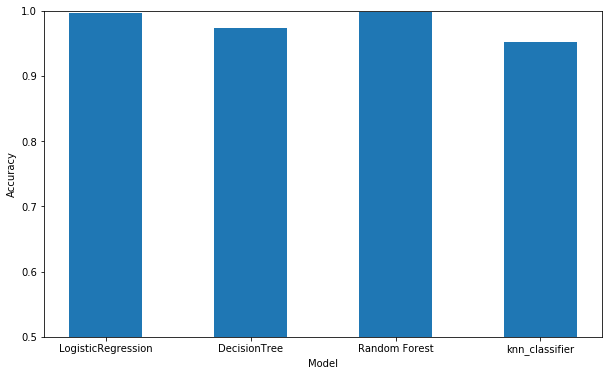

In [69]:
plt.figure(figsize=(10,6))
plt.ylim([0.5,1])
plt.bar(names,mean_score,width=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy')

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca_X=pca.fit_transform(X)

In [71]:
results = []
names = []
mean_score=[]
for name,model in models:
    kfold = KFold(shuffle = True,n_splits= 4,random_state=0)
    cv_results =cross_val_score(model,pca_X,y,cv = kfold,scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    mean_score.append(np.mean(cv_results))
    
    print('%s: %f (%f)'%(name,np.mean(cv_results),np.var(cv_results,ddof=1)))


LogisticRegression: 0.996531 (0.000020)
DecisionTree: 0.939701 (0.000411)
Random Forest: 0.984642 (0.000189)
knn_classifier: 0.952483 (0.000571)


Text(0, 0.5, 'Accuracy')

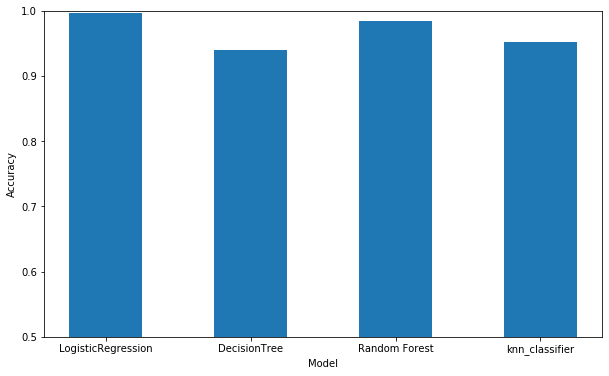

In [72]:
plt.figure(figsize=(10,6))
plt.ylim([0.5,1])
plt.bar(names,mean_score,width=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy')